In [1]:
from preprocess_income_data import preprocess_data 

X_train, X_test, X_val, y_train, y_val, y_test = preprocess_data()

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, losses, optimizers, Sequential
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
from const import DNN, DNN_ID

ALGORITHM_NAME = DNN
ALGORITHM_ID = DNN_ID

LEARNING_RATE = 0.001
EPOCHS = 10

model = Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=losses.binary_crossentropy,
    optimizer=optimizers.Adam(learning_rate=LEARNING_RATE),
    metrics=["accuracy"]
)


In [3]:
history = model.fit(X_train, y_train,
          epochs=EPOCHS,
          validation_data=(X_val, y_val))


Epoch 1/10
1018/1018 [==============================] - 3s 2ms/step - loss: 0.3286 - accuracy: 0.8466 - val_loss: 0.3184 - val_accuracy: 0.8503
Epoch 2/10
1018/1018 [==============================] - 2s 2ms/step - loss: 0.3076 - accuracy: 0.8566 - val_loss: 0.3117 - val_accuracy: 0.8563
Epoch 3/10
1018/1018 [==============================] - 2s 2ms/step - loss: 0.3034 - accuracy: 0.8593 - val_loss: 0.3116 - val_accuracy: 0.8558
Epoch 4/10
1018/1018 [==============================] - 3s 3ms/step - loss: 0.3002 - accuracy: 0.8596 - val_loss: 0.3100 - val_accuracy: 0.8579
Epoch 5/10
1018/1018 [==============================] - 3s 3ms/step - loss: 0.2967 - accuracy: 0.8615 - val_loss: 0.3133 - val_accuracy: 0.8594
Epoch 6/10
1018/1018 [==============================] - 3s 3ms/step - loss: 0.2936 - accuracy: 0.8639 - val_loss: 0.3103 - val_accuracy: 0.8571
Epoch 7/10
1018/1018 [==============================] - 3s 3ms/step - loss: 0.2905 - accuracy: 0.8655 - val_loss: 0.3121 - val_accuracy:

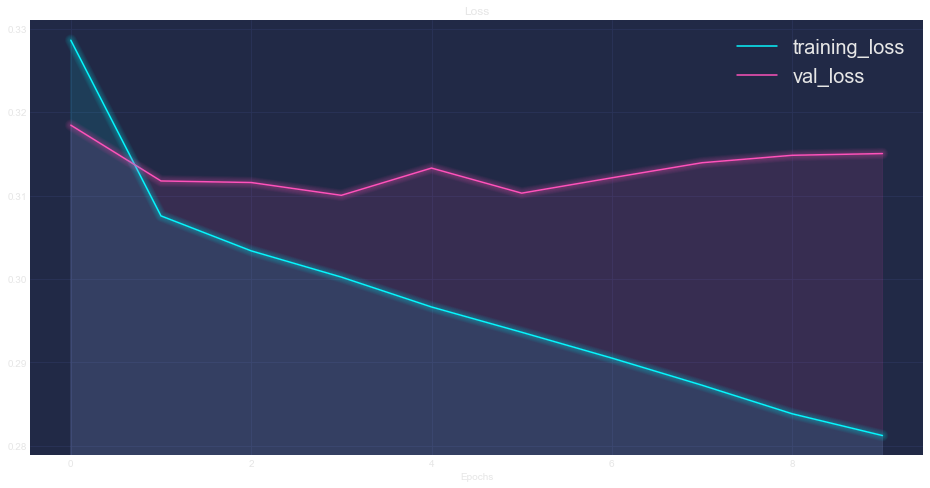

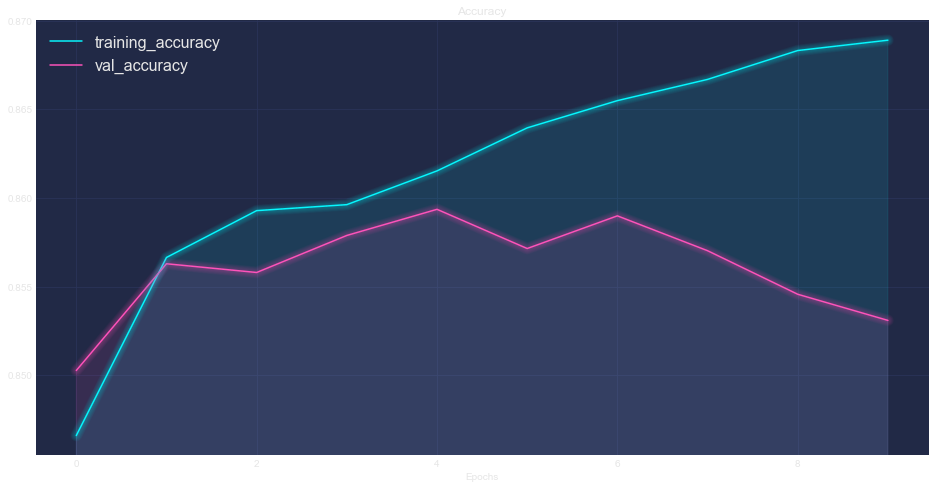

In [4]:
from plot_loss_curves import plot_loss_curves

plot_loss_curves(history)

In [9]:
y_pred = np.where(model.predict(X_test) > 0.5, 1, 0)


255/255 [==============================] - 0s 1ms/step


In [10]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)


classification_metrics_df = pd.DataFrame({
    'algorithm_id': ALGORITHM_ID,
    'algorithm_name': ALGORITHM_NAME,
    'best_accuracy': accuracy_score(y_test, y_pred),
    'precision': precision_score(y_test, y_pred),
    'recall': recall_score(y_test, y_pred),
    'roc_auc_score': roc_auc_score(y_test, y_pred),
    'true_positives': [cm[0, 0]],
    'false_positives': [cm[0, 1]],
    'false_negatives': [cm[1, 0]],
    'true_negatives': [cm[1, 1]]
})

classification_metrics_df.head()


[[5665  579]
 [ 628 1268]]


,algorithm_id,algorithm_name,best_accuracy,precision,recall,roc_auc_score,true_positives,false_positives,false_negatives,true_negatives
0,6,deep_neural_network,0.85172,0.686519,0.668776,0.788024,5665,579,628,1268


In [11]:
accuracy_scores_df = pd.DataFrame({
    "algorithm_id": [ALGORITHM_ID],
    "accuracy_score": [accuracy_score(y_test, y_pred)]
})


best_params_df = pd.DataFrame({
    "algorithm_id": [ALGORITHM_ID,  ALGORITHM_ID],
    "hyperparameter_name": ["learning_rate", "epochs"],
    "best_value": [LEARNING_RATE, EPOCHS],
})


In [12]:
from process_cv_results import results_to_csv

dfs = [accuracy_scores_df, best_params_df, classification_metrics_df]

results_to_csv(dfs, ALGORITHM_ID)